In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df=pd.read_csv('bajaj_finance.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5235 non-null   object 
 1   Symbol              5235 non-null   object 
 2   Series              5235 non-null   object 
 3   Prev Close          5235 non-null   float64
 4   Open                5235 non-null   float64
 5   High                5235 non-null   float64
 6   Low                 5235 non-null   float64
 7   Last                5235 non-null   float64
 8   Close               5235 non-null   float64
 9   VWAP                5235 non-null   float64
 10  Volume              5235 non-null   int64  
 11  Turnover            5235 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4789 non-null   float64
 14  %Deliverble         4789 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 613.6

In [3]:
df=df.sort_values(by='Date')

In [4]:
df['Date'].isnull().sum()

0

In [5]:
df['Date']=pd.to_datetime(df['Date'],errors='coerce')
df['date_ordinal']=df['Date'].map(pd.Timestamp.toordinal)
x=df[['date_ordinal']]
y=df['Close']

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [7]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Normalize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Apply Polynomial Features
poly = PolynomialFeatures(degree=3)  # Try 3 or 4
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)
model=LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

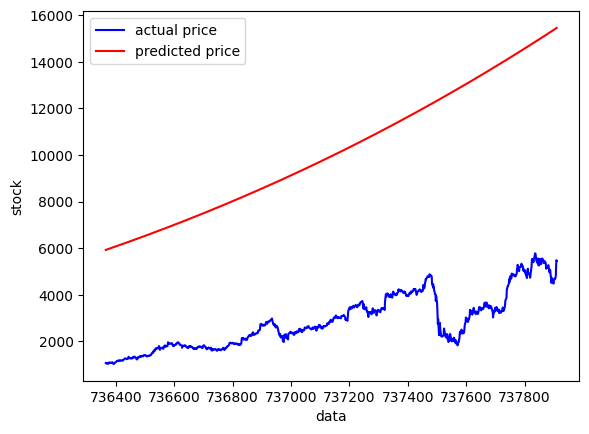

In [8]:

pre=model.predict(x_test_poly)
plt.plot(x_test,y_test,color='blue',label='actual price')
plt.plot(x_test,pre,color='red',label='predicted price')
plt.xlabel('data')
plt.ylabel('stock')
plt.legend()